# Final Project notebook - Upwelling index (BEUTI)

In [1]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
from scipy import stats
from SJ_tools import final_proj_functions as fpf
from matplotlib import mlab

/var/folders/9q/f1tj90w176qgctk31mz60mcw0000gn/T/ipykernel_4991/2328504617.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read in the jellyfish abundance data

In [2]:
file_path = '/Users/sarah/Documents/MLML/Current_classes/MS263-Data_Analysis/Final_project/data/MS263 jelly data.csv'
jellydf = pd.read_csv(file_path,header=1)

In [3]:
jellydf

,year,genus,region,abundance
0,1990,Chrysaora CA,central CA,0.247798
1,1991,Chrysaora CA,central CA,0.282914
2,1992,Chrysaora CA,central CA,1.382158
3,1993,Chrysaora CA,central CA,0.531131
4,1994,Chrysaora CA,central CA,0.468061
...,...,...,...,...
83,2012,Chrysaora PNW,PNW,7.425420
84,2013,Chrysaora PNW,PNW,8.488680
85,2014,Chrysaora PNW,PNW,7.848780
86,2015,Chrysaora PNW,PNW,0.266031


#### Subset the data

In [4]:
chrysaora_ca = jellydf[(jellydf['genus'] == 'Chrysaora CA')& (jellydf['region'] == 'central CA')]
chrysaora_pnw = jellydf[(jellydf['genus'] == 'Chrysaora PNW') & (jellydf['region'] == 'PNW')]
aurelia = jellydf[(jellydf['genus'] == 'Aurelia')]
aequorea = jellydf[(jellydf['genus'] == 'Aequorea')]

#### Calculate time series trend lines

In [5]:
#chrysaora_ca trend line
p = np.polyfit(chrysaora_ca['year'], chrysaora_ca['abundance'], 1)
slope = p[0]
intercept = p[1]
chry_bestfit = slope * chrysaora_ca['year'] + intercept
# chry_bestfit
print(slope)

-0.005468419531624213


In [6]:
#chrysaora_pnw trend line
p = np.polyfit(chrysaora_pnw['year'], chrysaora_pnw['abundance'], 1)
chry_pnw_slope = p[0]
chry_pnw_intercept = p[1]
chry_pnw_bestfit = chry_pnw_slope * chrysaora_pnw['year'] + chry_pnw_intercept
# chry_bestfit
print(chry_pnw_slope)

-0.16349746054694259


In [7]:
# aequorea trend line
aq_p = np.polyfit(aequorea['year'], aequorea['abundance'], 1)
aq_slope = aq_p[0]
aq_intercept = aq_p[1]
aequo_bestfit = aq_slope * aequorea['year'] + aq_intercept
print(aq_slope)

-0.023060338463370522


In [8]:
# aurelia trend line
aur_p = np.polyfit(aurelia['year'], aurelia['abundance'], 1)
aur_slope = aur_p[0]
aur_intercept = aur_p[1]
aurelia_bestfit = aur_slope * aurelia['year'] + aur_intercept
print(aur_slope)

0.000182606998290419


#### Plot the jelly abundance time series

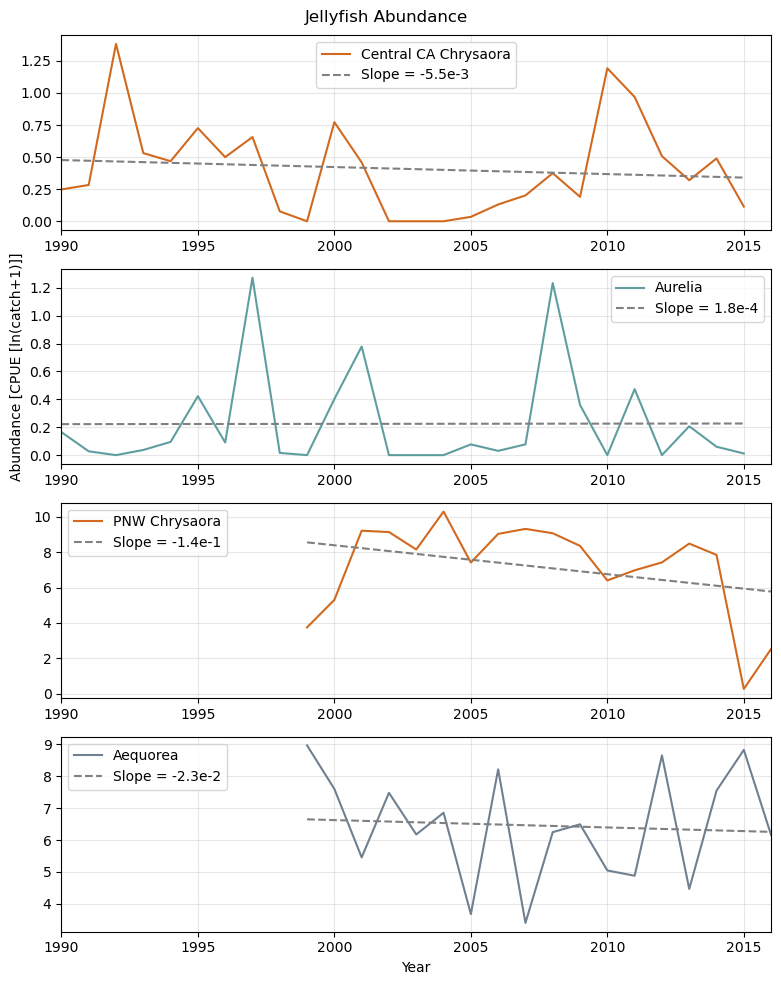

In [9]:
fig, axes = plt.subplots(4, 1, figsize=(8, 10))

#ca chrysaora
axes[0].plot(chrysaora_ca['year'], chrysaora_ca['abundance'], 'chocolate', label='Central CA Chrysaora')
axes[0].plot(chrysaora_ca['year'], chry_bestfit, 'grey', linestyle='--', label='Slope = -5.5e-3')
axes[0].set_xlim([1990, 2016])

#aurelia
axes[1].plot(aurelia['year'], aurelia['abundance'], 'cadetblue', label='Aurelia')
axes[1].plot(aurelia['year'], aurelia_bestfit, 'grey', linestyle='--', label='Slope = 1.8e-4')
axes[1].set_xlim([1990, 2016])

# pnw chrysaora
axes[2].plot(chrysaora_pnw['year'], chrysaora_pnw['abundance'], 'chocolate', label='PNW Chrysaora')
axes[2].plot(chrysaora_pnw['year'], chry_pnw_bestfit, 'grey', linestyle='--', label='Slope = -1.4e-1')
axes[2].set_xlim([1990, 2016])

# aequorea
axes[3].plot(aequorea['year'], aequorea['abundance'], 'slategray', label='Aequorea')
axes[3].plot(aequorea['year'], aequo_bestfit, 'grey', linestyle='--', label='Slope = -2.3e-2')
axes[3].set_xlim([1990, 2016])

axes[0].legend(loc='best')
axes[1].legend(loc='best')
axes[2].legend(loc='best')
axes[3].legend(loc='best')

axes[0].grid(alpha=0.3)
axes[1].grid(alpha=0.3)
axes[2].grid(alpha=0.3)
axes[3].grid(alpha=0.3)

fig.suptitle('Jellyfish Abundance')
plt.xlabel('Year')
axes[1].set_ylabel('Abundance [CPUE [ln(catch+1)]]')

plt.tight_layout()
plt.show()

#### Calculate relative genus abundance for central CA

In [10]:
central_ca = jellydf[jellydf['region'] == 'central CA']
pnw = jellydf[jellydf['region'] == 'PNW']

In [11]:
richness = 2
N_ca = np.sum(central_ca['abundance']) #total biomass of both genera
ni_chry_ca = np.sum(chrysaora_ca['abundance']) #total biomass of target genus
ni_aurelia = np.sum(aurelia['abundance'])

In [12]:
chry_relab_ca = (fpf.relative_abundance(richness, N_ca, ni_chry_ca)*100)
aurelia_rel_ab = (fpf.relative_abundance(richness, N_ca, ni_aurelia)*100)

#### Calulate relative genus abundance for PNW

In [13]:
N_pnw = np.sum(pnw['abundance']) #total biomass of all 3 genera
ni_chry_pnw = np.sum(chrysaora_pnw['abundance']) #total biomass of target genus
ni_aequo = np.sum(aequorea['abundance'])

In [14]:
chry_relab_pnw = (fpf.relative_abundance(richness, N_pnw, ni_chry_pnw)*100)
aequo_rel_ab = (fpf.relative_abundance(richness, N_pnw, ni_aequo)*100)

#### Calculate standard error for all genera

In [15]:
relative_abundance = [chry_relab_ca, aurelia_rel_ab, chry_relab_pnw, aequo_rel_ab]
genera = ['CA Chrysaora', 'Aurelia', 'PNW Chrysaora', 'Aequorea']

In [16]:
N_total = len(jellydf['abundance'])
mean = np.mean(relative_abundance)
std = np.std(relative_abundance)
error = std/np.sqrt(N_total)

#### Plot relative genus abundance

In [17]:
x_aur = [2]
y_aur = [aurelia_rel_ab]

x_chry = [3,6]
y_chry = [chry_relab_ca, chry_relab_pnw]

x_aeq = [5]
y_aeq = [aequo_rel_ab]

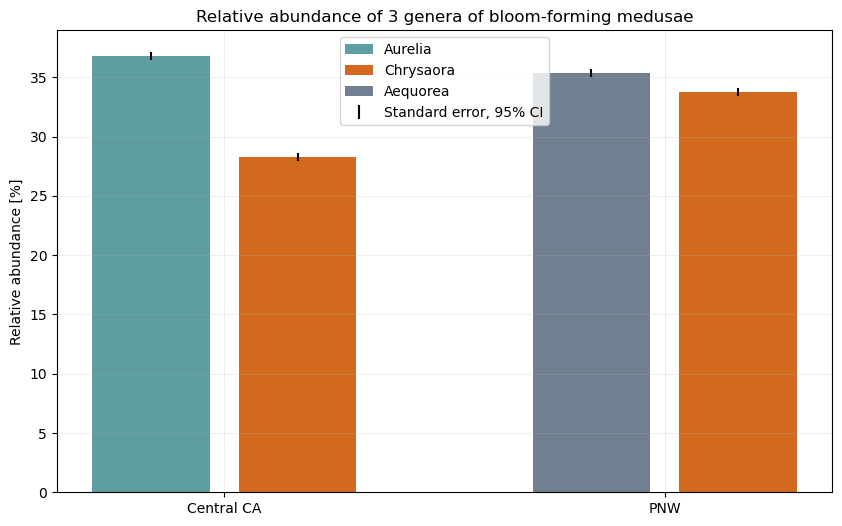

In [18]:
plt.figure(figsize=(10,6))

plt.bar(x_aur, y_aur, label='Aurelia', color='cadetblue')
plt.bar(x_chry, y_chry, label='Chrysaora', color='chocolate')
plt.bar(x_aeq, y_aeq, label='Aequorea', color='slategray')
plt.errorbar([3,2,6,5], relative_abundance, yerr=error, fmt='none', color='k', label='Standard error, 95% CI')
plt.gca().set_xticks([2.5,5.5])
plt.gca().set_xticklabels(['Central CA', 'PNW'])
plt.ylabel('Relative abundance [%]')
plt.grid(linewidth=0.5, alpha=0.3)
plt.legend(loc='upper center')
plt.title('Relative abundance of 3 genera of bloom-forming medusae')
plt.show()

In [19]:
# t test to see if there is a difference in overall jelly abundance between the two regions
region_ttest = stats.ttest_ind(central_ca['abundance'], pnw['abundance'], equal_var=False) 
region_ttest

TtestResult(statistic=-17.304051439830847, pvalue=3.88438927165647e-19, df=36.36362449080731)

The pvalue is less than alpha with a 95% confidence interval, so we rejct the null hypothesis of no difference between the overall region jelly abundances.

In [20]:
# check for normality and equal variances
# normality - use Shapiro-Wilk test
tstat_cachry, pvalue_cachry = stats.shapiro(chrysaora_ca['abundance'])
tstat_aurelia, pvalue_aurelia = stats.shapiro(aurelia['abundance'])
tstat_pnwchry, pvalue_pnwchry = stats.shapiro(chrysaora_pnw['abundance'])
tstat_aequo, pvalue_aequo = stats.shapiro(aequorea['abundance'])

if pvalue_cachry > 0.05:
    print('CA Chrysaora abundance is normally distributed')
else:
    print('CA Chrysaora abundance is NOT normally distributed')
    
if pvalue_aurelia > 0.05:
    print('Aurelia abundance is normally distributed')
else:
    print('Aurelia abundance is NOT normally distributed')
    
if pvalue_pnwchry > 0.05:
    print('PNW Chrysaora abundance is normally distributed')
else:
    print('PNW Chrysaora abundance is NOT normally distributed')
    
if pvalue_aequo > 0.05:
    print('Aequorea abundance is normally distributed')
else:
    print('Aequorea abundance is NOT normally distributed')

# calculate variances
var_ca_chry = np.var(chrysaora_ca['abundance'])
var_aurelia = np.var(aurelia['abundance'])
var_pnw_chry = np.var(chrysaora_pnw['abundance'])
var_aequo = np.var(aequorea['abundance'])
print('CA Chrysaora var:'+str(var_ca_chry))
print('Aurelia var:'+str(var_aurelia))
print('PNW Chrysaora var:'+str(var_pnw_chry))
print('Aequorea var:'+str(var_aequo))

CA Chrysaora abundance is NOT normally distributed
Aurelia abundance is NOT normally distributed
PNW Chrysaora abundance is NOT normally distributed
Aequorea abundance is normally distributed
CA Chrysaora var:0.13218589800633943
Aurelia var:0.124554273804289
PNW Chrysaora var:6.625184653234492
Aequorea var:2.787270697668261


None of the abundance data are normally distributed *except* Aequorea, and the variances are unequal. Therefore I will run a Welch ANOVA (robust to deviations from normality and does not assume equal variance, however, it assumes that sample sizes are approximately equal-- in this case, they almost are: N_ca=26 and N_pnw=17)

In [21]:
# anova
genus_anova, genus_posthoc = fpf.jelly_anova(jellydf)
genus_anova

,Source,ddof1,ddof2,F,p-unc,np2
0,genus,3,36.764356,111.305814,1.675027e-18,0.836648


There is a significant difference between abundances of each genus, so I will now run a non-parametric post-hoc test to find where those difference(s) are.

In [22]:
genus_posthoc

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,Aequorea,Aurelia,6.451978,0.224583,6.227395,0.443959,14.026962,2.153833e-14,5.423130
1,Aequorea,Chrysaora CA,6.451978,0.408672,6.043306,0.443959,13.612310,2.153833e-14,5.253068
2,Aequorea,Chrysaora PNW,6.451978,7.167618,-0.715640,0.482634,-1.482780,4.523729e-01,-0.313463
3,Aurelia,Chrysaora CA,0.224583,0.408672,-0.184089,0.401576,-0.458416,9.678016e-01,-0.496229
4,Aurelia,Chrysaora PNW,0.224583,7.167618,-6.943035,0.443959,-15.638915,2.153833e-14,-3.992528
5,Chrysaora CA,Chrysaora PNW,0.408672,7.167618,-6.758946,0.443959,-15.224262,2.153833e-14,-3.883525


In [23]:
file_path2 = '/Users/sarah/Documents/MLML/Current_classes/MS263-Data_Analysis/Final_project/data/BEUTI_monthly.csv'
beutidf = pd.read_csv(file_path2,header=0)
beutidf['date'] = beutidf['month'].astype(str) + '-' + beutidf['year'].astype(str)
beutidf['date'] = pd.to_datetime(beutidf['date'], )
beutidf

/var/folders/9q/f1tj90w176qgctk31mz60mcw0000gn/T/ipykernel_4991/4012382450.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  beutidf['date'] = pd.to_datetime(beutidf['date'], )


,year,month,31N,32N,33N,34N,35N,36N,37N,38N,39N,40N,41N,42N,43N,44N,45N,46N,47N,date
0,1988,1,0.304,0.892,0.614,1.411,3.136,4.947,1.517,0.388,2.160,1.934,-1.992,-2.474,-1.134,-0.892,-0.442,0.460,-4.750,1988-01-01
1,1988,2,0.047,0.453,0.596,0.828,1.358,5.663,3.261,5.043,9.580,10.786,6.864,9.469,6.438,1.393,3.258,1.068,0.225,1988-02-01
2,1988,3,0.882,0.633,0.579,3.321,9.998,11.624,16.402,12.766,25.179,19.528,12.638,10.103,8.930,-1.720,0.762,-0.248,0.658,1988-03-01
3,1988,4,0.635,0.189,0.170,1.346,4.503,3.317,4.471,-1.628,10.962,6.143,3.655,8.970,4.704,-1.430,0.902,-0.327,-1.255,1988-04-01
4,1988,5,1.636,0.754,0.735,5.891,15.041,13.531,15.532,11.123,19.798,12.773,4.003,4.624,2.390,-0.935,0.068,0.056,-0.214,1988-05-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2023,12,0.171,0.091,0.009,0.144,0.548,0.742,0.301,-0.513,-1.088,-1.687,-3.143,-3.465,-4.050,-1.734,-0.973,-1.331,-0.751,2023-12-01
432,2024,1,0.862,0.486,0.309,0.800,1.222,1.073,-0.133,0.249,-1.757,-2.027,-5.245,-3.506,-5.993,-2.756,-2.231,-3.749,-0.036,2024-01-01
433,2024,2,1.044,0.440,0.272,0.350,0.180,0.365,-0.402,0.319,-0.353,-0.782,-2.398,-3.146,-3.868,-3.327,-0.791,-2.152,-0.493,2024-02-01
434,2024,3,2.649,1.007,1.027,2.424,3.214,3.081,1.466,1.193,2.148,1.397,-0.268,-0.279,-1.201,-1.326,-1.758,-1.036,-0.120,2024-03-01


In [24]:
# subset - only need years 1990-2016 and latitudes 36 and 46? what is best to represent pnw?
ii = ((beutidf['year'] >= 1990) & (beutidf['year'] <= 2016))
beuti_sub = beutidf[ii]
beuti_sub = beuti_sub.iloc[:, [19,0,1,7,17]]
beuti_sub

,date,year,month,36N,46N
24,1990-01-01,1990,1,3.568,-0.821
25,1990-02-01,1990,2,5.526,2.073
26,1990-03-01,1990,3,10.714,1.928
27,1990-04-01,1990,4,8.017,1.710
28,1990-05-01,1990,5,4.836,1.202
...,...,...,...,...,...
343,2016-08-01,2016,8,2.942,0.827
344,2016-09-01,2016,9,2.436,0.713
345,2016-10-01,2016,10,1.251,-0.020
346,2016-11-01,2016,11,1.042,0.000


36N will be used for central ca and 46N for pnw

### Cross correlation of jelly blooms with BEUTI index

Visualize the time series of nitrate flux recorded in the BEUTI index

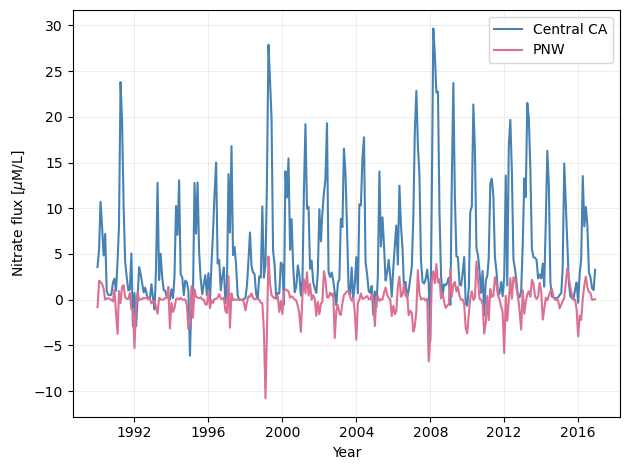

In [25]:
plt.figure()

plt.plot(beuti_sub['date'], beuti_sub['36N'], color='steelblue', label='Central CA')
plt.plot(beuti_sub['date'], beuti_sub['46N'], color='palevioletred', label='PNW')
plt.xlabel('Year')
plt.ylabel('Nitrate flux [$\mu$M/L]')
plt.legend(loc='best')
plt.grid(linewidth=0.5, alpha=0.3)
plt.tight_layout()

In [26]:
date_array = np.array(beuti_sub['date']).flatten()
date_array = date_array.astype(int)

beuti_array_ca = np.array([beuti_sub['36N']]).flatten()
beuti_array_ca = beuti_array_ca.astype(float)

beuti_array_pnw = np.array([beuti_sub['46N']]).flatten()
beuti_array_pnw = beuti_array_pnw.astype(float)

In [37]:
# subset so that jelly and beuti data are equal length
# separate ones for ca and pnw since sample dates are diff
# one for every month

# january
jan_pnw = ((beuti_sub['month']==1) & (beuti_sub['year']>=1999))
beuti_jan_pnw = beuti_sub[jan_pnw]
beuti_jan_pnw = np.array(beuti_jan_pnw.iloc[:,[3]].astype(float)).flatten()

jan_ca = (beuti_sub['month']==1) & (beuti_sub['year']<=2015)
beuti_jan_ca = beuti_sub[jan_ca]
beuti_jan_ca = np.array(beuti_jan_ca.iloc[:,[3]].astype(float)).flatten()

# february
feb_pnw = ((beuti_sub['month']==2) & (beuti_sub['year']>=1999))
beuti_feb_pnw = beuti_sub[feb_pnw]
beuti_feb_pnw = np.array(beuti_feb_pnw.iloc[:,[3]].astype(float)).flatten()

feb_ca = (beuti_sub['month']==2) & (beuti_sub['year']<=2015)
beuti_feb_ca = beuti_sub[feb_ca]
beuti_feb_ca = np.array(beuti_feb_ca.iloc[:,[3]].astype(float)).flatten()

# march
mar_pnw = ((beuti_sub['month']==3) & (beuti_sub['year']>=1999))
beuti_mar_pnw = beuti_sub[mar_pnw]
beuti_mar_pnw = np.array(beuti_mar_pnw.iloc[:,[3]].astype(float)).flatten()

mar_ca = (beuti_sub['month']==3) & (beuti_sub['year']<=2015)
beuti_mar_ca = beuti_sub[mar_ca]
beuti_mar_ca = np.array(beuti_mar_ca.iloc[:,[3]].astype(float)).flatten()

# april
apr_pnw = ((beuti_sub['month']==4) & (beuti_sub['year']>=1999))
beuti_apr_pnw = beuti_sub[apr_pnw]
beuti_apr_pnw = np.array(beuti_apr_pnw.iloc[:,[3]].astype(float)).flatten()

apr_ca = (beuti_sub['month']==4) & (beuti_sub['year']<=2015)
beuti_apr_ca = beuti_sub[apr_ca]
beuti_apr_ca = np.array(beuti_apr_ca.iloc[:,[3]].astype(float)).flatten()

# may
may_pnw = ((beuti_sub['month']==5) & (beuti_sub['year']>=1999))
beuti_may_pnw = beuti_sub[may_pnw]
beuti_may_pnw = np.array(beuti_may_pnw.iloc[:,[3]].astype(float)).flatten()

may_ca = (beuti_sub['month']==5) & (beuti_sub['year']<=2015)
beuti_may_ca = beuti_sub[may_ca]
beuti_may_ca = np.array(beuti_may_ca.iloc[:,[3]].astype(float)).flatten()

# june
june_pnw = ((beuti_sub['month']==6) & (beuti_sub['year']>=1999))
beuti_june_pnw = beuti_sub[june_pnw]
beuti_june_pnw = np.array(beuti_june_pnw.iloc[:,[3]].astype(float)).flatten()

june_ca = (beuti_sub['month']==6) & (beuti_sub['year']<=2015)
beuti_june_ca = beuti_sub[june_ca]
beuti_june_ca = np.array(beuti_june_ca.iloc[:,[3]].astype(float)).flatten()

# july
jul_pnw = ((beuti_sub['month']==7) & (beuti_sub['year']>=1999))
beuti_jul_pnw = beuti_sub[jul_pnw]
beuti_jul_pnw = np.array(beuti_jul_pnw.iloc[:,[3]].astype(float)).flatten()

jul_ca = (beuti_sub['month']==7) & (beuti_sub['year']<=2015)
beuti_jul_ca = beuti_sub[jul_ca]
beuti_jul_ca = np.array(beuti_jul_ca.iloc[:,[3]].astype(float)).flatten()

# august
aug_pnw = ((beuti_sub['month']==8) & (beuti_sub['year']>=1999))
beuti_aug_pnw = beuti_sub[aug_pnw]
beuti_aug_pnw = np.array(beuti_aug_pnw.iloc[:,[3]].astype(float)).flatten()

aug_ca = (beuti_sub['month']==8) & (beuti_sub['year']<=2015)
beuti_aug_ca = beuti_sub[aug_ca]
beuti_aug_ca = np.array(beuti_aug_ca.iloc[:,[3]].astype(float)).flatten()

# september
sep_pnw = ((beuti_sub['month']==9) & (beuti_sub['year']>=1999))
beuti_sep_pnw = beuti_sub[sep_pnw]
beuti_sep_pnw = np.array(beuti_sep_pnw.iloc[:,[3]].astype(float)).flatten()

sep_ca = (beuti_sub['month']==9) & (beuti_sub['year']<=2015)
beuti_sep_ca = beuti_sub[sep_ca]
beuti_sep_ca = np.array(beuti_sep_ca.iloc[:,[3]].astype(float)).flatten()

# october
oct_pnw = ((beuti_sub['month']==10) & (beuti_sub['year']>=1999))
beuti_oct_pnw = beuti_sub[oct_pnw]
beuti_oct_pnw = np.array(beuti_oct_pnw.iloc[:,[3]].astype(float)).flatten()

oct_ca = (beuti_sub['month']==10) & (beuti_sub['year']<=2015)
beuti_oct_ca = beuti_sub[oct_ca]
beuti_oct_ca = np.array(beuti_oct_ca.iloc[:,[3]].astype(float)).flatten()

# november
nov_pnw = ((beuti_sub['month']==11) & (beuti_sub['year']>=1999))
beuti_nov_pnw = beuti_sub[nov_pnw]
beuti_nov_pnw = np.array(beuti_nov_pnw.iloc[:,[3]].astype(float)).flatten()

nov_ca = (beuti_sub['month']==11) & (beuti_sub['year']<=2015)
beuti_nov_ca = beuti_sub[nov_ca]
beuti_nov_ca = np.array(beuti_nov_ca.iloc[:,[3]].astype(float)).flatten()

# december
dec_pnw = ((beuti_sub['month']==12) & (beuti_sub['year']>=1999))
beuti_dec_pnw = beuti_sub[dec_pnw]
beuti_dec_pnw = np.array(beuti_dec_pnw.iloc[:,[3]].astype(float)).flatten()

dec_ca = (beuti_sub['month']==12) & (beuti_sub['year']<=2015)
beuti_dec_ca = beuti_sub[dec_ca]
beuti_dec_ca = np.array(beuti_dec_ca.iloc[:,[3]].astype(float)).flatten()

In [38]:
chrysaora_ca_abundance = chrysaora_ca['abundance']
aurelia_abundance = aurelia['abundance']
chrysaora_pnw_abundance = chrysaora_pnw['abundance']
aequorea_abundance = aequorea['abundance']

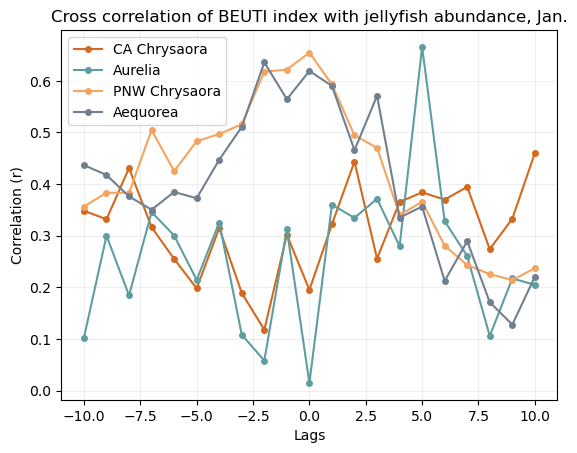

Jan. - r = 0.6 for PNW Chry. and Aequor at 1 lag (5 months after Jan. upwelling winds), Aurelia r=0.66 at 5 lags (25 months???), CA Chry. r=0.44 at 2 lags (10 months?)

Dec. - r=0.63 at 6 lags (30 months??) for CA Chry., at 0 lags Aequor r=0.62

each lag is 1 year

compute correlations for each month of data - manually calc. r values, then plot - np.corrcoef(), might be better to do r^2

compute r values for each month of BEUTI data

In [80]:
def calc_correlations(beuti, jellies):
    r2_array = (np.sqrt(np.abs(np.corrcoef(beuti, jellies, rowvar=False))))
    r2_value = np.fliplr(r2_array).diagonal()
    r2 = r2_value[0]
    return(r2)

In [81]:
# january
jan_cachry_r = calc_correlations(beuti_jan_ca, chrysaora_ca_abundance)
jan_aur_r = calc_correlations(beuti_jan_ca, aurelia_abundance)
jan_pnwchry_r = calc_correlations(beuti_jan_pnw, chrysaora_pnw_abundance)
jan_aeq_r = calc_correlations(beuti_jan_pnw, aequorea_abundance)

# february
feb_cachry_r = calc_correlations(beuti_feb_ca, chrysaora_ca_abundance)
feb_aur_r = calc_correlations(beuti_feb_ca, aurelia_abundance)
feb_pnwchry_r = calc_correlations(beuti_feb_pnw, chrysaora_pnw_abundance)
feb_aeq_r = calc_correlations(beuti_feb_pnw, aequorea_abundance)

# march
mar_cachry_r = calc_correlations(beuti_mar_ca, chrysaora_ca_abundance)
mar_aur_r = calc_correlations(beuti_mar_ca, aurelia_abundance)
mar_pnwchry_r = calc_correlations(beuti_mar_pnw, chrysaora_pnw_abundance)
mar_aeq_r = calc_correlations(beuti_mar_pnw, aequorea_abundance)

# april
apr_cachry_r = calc_correlations(beuti_apr_ca, chrysaora_ca_abundance)
apr_aur_r = calc_correlations(beuti_apr_ca, aurelia_abundance)
apr_pnwchry_r = calc_correlations(beuti_apr_pnw, chrysaora_pnw_abundance)
apr_aeq_r = calc_correlations(beuti_apr_pnw, aequorea_abundance)

# may
may_cachry_r = calc_correlations(beuti_may_ca, chrysaora_ca_abundance)
may_aur_r = calc_correlations(beuti_may_ca, aurelia_abundance)
may_pnwchry_r = calc_correlations(beuti_may_pnw, chrysaora_pnw_abundance)
may_aeq_r = calc_correlations(beuti_may_pnw, aequorea_abundance)

# june
june_cachry_r = calc_correlations(beuti_june_ca, chrysaora_ca_abundance)
june_aur_r = calc_correlations(beuti_june_ca, aurelia_abundance)
june_pnwchry_r = calc_correlations(beuti_june_pnw, chrysaora_pnw_abundance)
june_aeq_r = calc_correlations(beuti_june_pnw, aequorea_abundance)

# july
jul_cachry_r = calc_correlations(beuti_jul_ca, chrysaora_ca_abundance)
jul_aur_r = calc_correlations(beuti_jul_ca, aurelia_abundance)
jul_pnwchry_r = calc_correlations(beuti_jul_pnw, chrysaora_pnw_abundance)
jul_aeq_r = calc_correlations(beuti_jul_pnw, aequorea_abundance)

# august
aug_cachry_r = calc_correlations(beuti_aug_ca, chrysaora_ca_abundance)
aug_aur_r = calc_correlations(beuti_aug_ca, aurelia_abundance)
aug_pnwchry_r = calc_correlations(beuti_aug_pnw, chrysaora_pnw_abundance)
aug_aeq_r = calc_correlations(beuti_aug_pnw, aequorea_abundance)

# september
sep_cachry_r = calc_correlations(beuti_sep_ca, chrysaora_ca_abundance)
sep_aur_r = calc_correlations(beuti_sep_ca, aurelia_abundance)
sep_pnwchry_r = calc_correlations(beuti_sep_pnw, chrysaora_pnw_abundance)
sep_aeq_r = calc_correlations(beuti_sep_pnw, aequorea_abundance)

# october
oct_cachry_r = calc_correlations(beuti_oct_ca, chrysaora_ca_abundance)
oct_aur_r = calc_correlations(beuti_oct_ca, aurelia_abundance)
oct_pnwchry_r = calc_correlations(beuti_oct_pnw, chrysaora_pnw_abundance)
oct_aeq_r = calc_correlations(beuti_oct_pnw, aequorea_abundance)

# november
nov_cachry_r = calc_correlations(beuti_nov_ca, chrysaora_ca_abundance)
nov_aur_r = calc_correlations(beuti_nov_ca, aurelia_abundance)
nov_pnwchry_r = calc_correlations(beuti_nov_pnw, chrysaora_pnw_abundance)
nov_aeq_r = calc_correlations(beuti_nov_pnw, aequorea_abundance)

# december
dec_cachry_r = calc_correlations(beuti_dec_ca, chrysaora_ca_abundance)
dec_aur_r = calc_correlations(beuti_dec_ca, aurelia_abundance)
dec_pnwchry_r = calc_correlations(beuti_dec_pnw, chrysaora_pnw_abundance)
dec_aeq_r = calc_correlations(beuti_dec_pnw, aequorea_abundance)

In [82]:
ca_chry_r2s = [jan_cachry_r, feb_cachry_r, mar_cachry_r, apr_cachry_r, may_cachry_r, june_cachry_r,
               jul_cachry_r, aug_cachry_r, sep_cachry_r, oct_cachry_r, nov_cachry_r, dec_cachry_r]
aur_r2s = [jan_aur_r, feb_aur_r, mar_aur_r, apr_aur_r, may_aur_r, june_aur_r,
               jul_aur_r, aug_aur_r, sep_aur_r, oct_aur_r, nov_aur_r, dec_aur_r]
pnw_chry_r2s = [jan_pnwchry_r, feb_pnwchry_r, mar_pnwchry_r, apr_pnwchry_r, may_pnwchry_r, june_pnwchry_r,
               jul_pnwchry_r, aug_pnwchry_r, sep_pnwchry_r, oct_pnwchry_r, nov_pnwchry_r, dec_pnwchry_r]
aeq_r2s = [jan_aeq_r, feb_aeq_r, mar_aeq_r, apr_aeq_r, may_aeq_r, june_aeq_r,
               jul_aeq_r, aug_aeq_r, sep_aeq_r, oct_aeq_r, nov_aeq_r, dec_aeq_r]

In [88]:
months = ['Jan', 'Feb', 'March', 'April', 'May', 'June', 'July', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

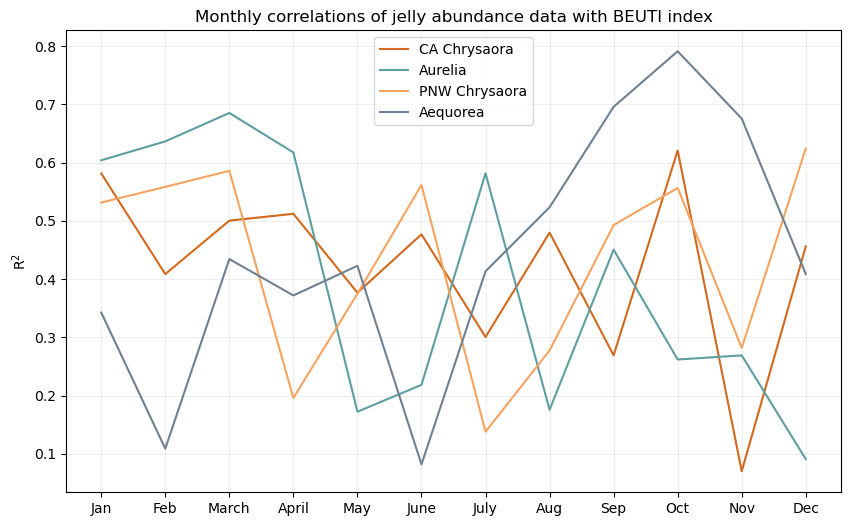

In [92]:
plt.figure(figsize=(10,6))

plt.plot(months, ca_chry_r2s, color='chocolate', label='CA Chrysaora')
plt.plot(months, aur_r2s, color='cadetblue', label='Aurelia')
plt.plot(months, pnw_chry_r2s, color='sandybrown', label='PNW Chrysaora')
plt.plot(months, aeq_r2s, color='slategray', label='Aequorea')
plt.title('Monthly correlations of jelly abundance data with BEUTI index')
plt.ylabel('R$^2$')
plt.grid(linewidth=0.5, alpha=0.3)
plt.legend(loc='best')
plt.show()

#### Plot the significant cross correlations

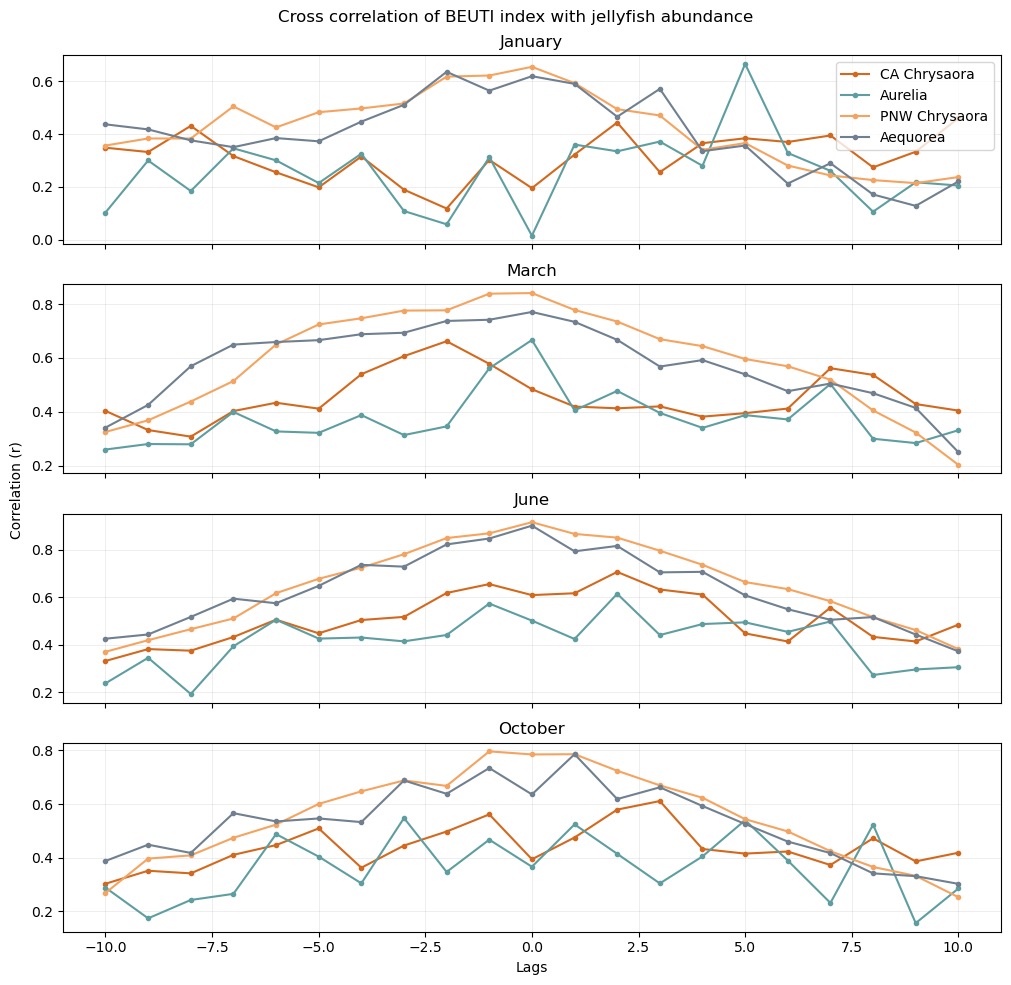

In [120]:
fig, axes = plt.subplots(4,1, figsize=(10,10))

# jan
axes[0].xcorr(beuti_jan_ca, chrysaora_ca_abundance, usevlines=False, linestyle='-',
         markersize=3, color='chocolate', label='CA Chrysaora')
axes[0].xcorr(beuti_jan_ca, aurelia_abundance, usevlines=False, linestyle='-',
         markersize=3, color='cadetblue', label='Aurelia')
axes[0].xcorr(beuti_jan_pnw, chrysaora_pnw_abundance, usevlines=False, linestyle='-',
         markersize=3, color='sandybrown', label='PNW Chrysaora')
axes[0].xcorr(beuti_jan_pnw, aequorea_abundance, usevlines=False, linestyle='-',
         markersize=3, color='slategray', label='Aequorea')
axes[0].set_title('January')
axes[0].legend(loc='best')
axes[0].grid(linewidth=0.5, alpha=0.3)
axes[0].set_xticklabels([])

# march
axes[1].xcorr(beuti_mar_ca, chrysaora_ca_abundance, usevlines=False, linestyle='-',
         markersize=3, color='chocolate', label='CA Chrysaora')
axes[1].xcorr(beuti_mar_ca, aurelia_abundance, usevlines=False, linestyle='-',
         markersize=3, color='cadetblue', label='Aurelia')
axes[1].xcorr(beuti_mar_pnw, chrysaora_pnw_abundance, usevlines=False, linestyle='-',
         markersize=3, color='sandybrown', label='PNW Chrysaora')
axes[1].xcorr(beuti_mar_pnw, aequorea_abundance, usevlines=False, linestyle='-',
         markersize=3, color='slategray', label='Aequorea')
axes[1].set_title('March')
axes[1].grid(linewidth=0.5, alpha=0.3)
axes[1].set_xticklabels([])

# june
axes[2].xcorr(beuti_june_ca, chrysaora_ca_abundance, usevlines=False, linestyle='-',
         markersize=3, color='chocolate', label='CA Chrysaora')
axes[2].xcorr(beuti_june_ca, aurelia_abundance, usevlines=False, linestyle='-',
         markersize=3, color='cadetblue', label='Aurelia')
axes[2].xcorr(beuti_june_pnw, chrysaora_pnw_abundance, usevlines=False, linestyle='-',
         markersize=3, color='sandybrown', label='PNW Chrysaora')
axes[2].xcorr(beuti_june_pnw, aequorea_abundance, usevlines=False, linestyle='-',
         markersize=3, color='slategray', label='Aequorea')
axes[2].set_title('June')
axes[2].grid(linewidth=0.5, alpha=0.3)
axes[2].set_xticklabels([])

# oct
axes[3].xcorr(beuti_oct_ca, chrysaora_ca_abundance, usevlines=False, linestyle='-',
         markersize=3, color='chocolate', label='CA Chrysaora')
axes[3].xcorr(beuti_oct_ca, aurelia_abundance, usevlines=False, linestyle='-',
         markersize=3, color='cadetblue', label='Aurelia')
axes[3].xcorr(beuti_oct_pnw, chrysaora_pnw_abundance, usevlines=False, linestyle='-',
         markersize=3, color='sandybrown', label='PNW Chrysaora')
axes[3].xcorr(beuti_oct_pnw, aequorea_abundance, usevlines=False, linestyle='-',
         markersize=3, color='slategray', label='Aequorea')
axes[3].set_title('October')
axes[3].set_xlabel('Lags')
axes[3].grid(linewidth=0.5, alpha=0.3)


plt.suptitle('Cross correlation of BEUTI index with jellyfish abundance')
# follwing line written with help from user wwliao on StackOverflow
fig.text(0.001, 0.5, 'Correlation (r)', ha='center', va='center', rotation='vertical')
plt.tight_layout()